In [1]:
import pandas as pd
import sys
import numpy as np
import os


In [2]:
sys.path.insert(1, '../../script')
import dimensional_tools
import practica1_m3

dist = practica1_m3.Distancias('1')

In [3]:
path = '../../data/modulo3/Citibike NY/'

In [4]:
os.listdir(path)

['JC-202010-citibike-tripdata.csv',
 'JC-202006-citibike-tripdata.csv',
 'JC-202105-citibike-tripdata.csv',
 'JC-201902-citibike-tripdata.csv',
 '.DS_Store',
 'JC-202201-citibike-tripdata.csv',
 'JC-202111-citibike-tripdata.csv',
 'JC-202012-citibike-tripdata.csv',
 'JC-202004-citibike-tripdata.csv',
 'JC-202107-citibike-tripdata.csv',
 'JC-201908-citibike-tripdata.csv',
 'JC-202109-citibike-tripdata.csv',
 'JC-202101-citibike-tripdata.csv',
 'JC-202002-citibike-tripdata.csv',
 'JC-201910-citibike-tripdata.csv',
 'JC-201906-citibike-tripdata.csv',
 'JC-202008-citibike-tripdata.csv',
 'JC-201912-citibike-tripdata.csv',
 'JC-201904-citibike-tripdata.csv',
 'JC-202103-citibike-tripdata.csv',
 'JC-202007-citibike-tripdata.csv',
 'JC-202104-citibike-tripdata.csv',
 'JC-202112-citibike-tripdata.csv',
 'JC-202011-citibike-tripdata.csv',
 'JC-201903-citibike-tripdata.csv',
 'JC-202202-citibike-tripdata.csv',
 'JC-201909-citibike-tripdata.csv',
 'JC-201901-citibike-tripdata.csv',
 'JC-202005-ci

In [5]:
files = [x for x in os.listdir(path) if '.csv' in x]

In [6]:
df = pd.DataFrame()
for i in files:
    df = pd.concat([df, pd.read_csv(path + i)])

In [7]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,156.0,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186.0,Grove St PATH,40.719586,-74.043117,3270.0,Jersey & 6th St,40.725289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143.0,2020-10-01 00:02:53.5020,2020-10-01 00:05:16.9650,3186.0,Grove St PATH,40.719586,-74.043117,3270.0,Jersey & 6th St,40.725289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,305.0,2020-10-01 00:04:31.3160,2020-10-01 00:09:36.3840,3273.0,Manila & 1st,40.721651,-74.042884,3269.0,Brunswick & 6th,40.726012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1097.0,2020-10-01 00:05:18.3680,2020-10-01 00:23:36.1240,3199.0,Newport Pkwy,40.728745,-74.032108,3281.0,Leonard Gordon Park,40.745910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,277.0,2020-10-01 00:09:17.5990,2020-10-01 00:13:55.5150,3199.0,Newport Pkwy,40.728745,-74.032108,3638.0,Washington St,40.724294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

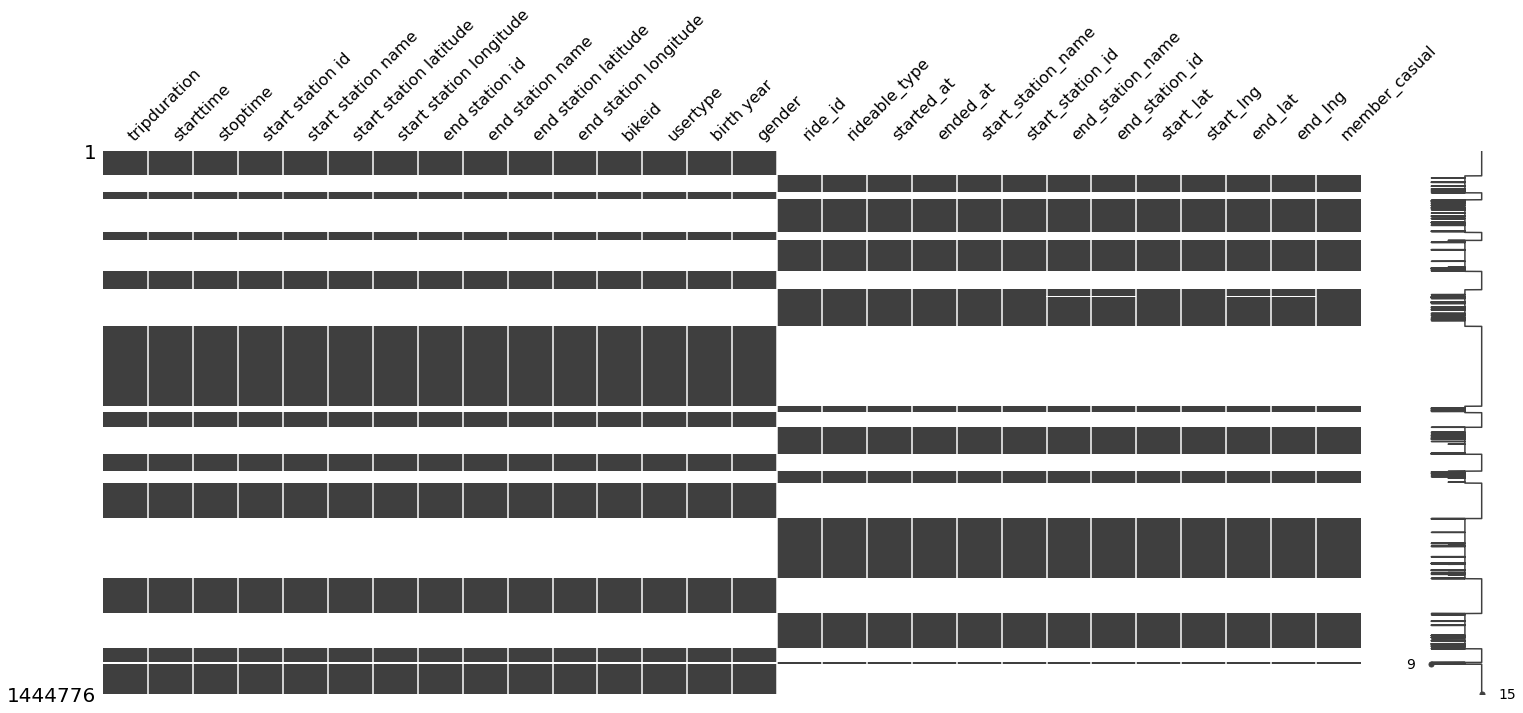

In [8]:
import missingno as msno
msno.matrix(df)

In [9]:
df.shape

(1444776, 28)

In [10]:
df = df[df.columns[:15]].dropna()

In [11]:
df.shape

(753373, 15)

In [12]:
df.reset_index(drop = True, inplace = True)

In [13]:
tr = df[['start station id', 'start station name', 'start station latitude', 'end station latitude', 'start station longitude', 'end station longitude', 'tripduration']].copy()
tr.columns = ['id', 'name', 'slat', 'elat', 'slong', 'elong', 'trip_d']

In [14]:
tr.head()

,id,name,slat,elat,slong,elong,trip_d
0,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,156.0
1,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,143.0
2,3273.0,Manila & 1st,40.721651,40.726012,-74.042884,-74.050389,305.0
3,3199.0,Newport Pkwy,40.728745,40.745910,-74.032108,-74.057271,1097.0
4,3199.0,Newport Pkwy,40.728745,40.724294,-74.032108,-74.035483,277.0


In [15]:
stations = (tr[[c for c in tr.columns if c != 'id']]
            .groupby('name').agg({'slat':pd.Series.mode, 'elat':pd.Series.mode,
                                  'slong':pd.Series.mode, 'elong':pd.Series.mode,
                                  'trip_d':'count'}))

In [16]:
stations

,slat,elat,slong,elong,trip_d
name,,,,,
5 Corners Library,40.734961,40.742677,-74.059503,-74.051789,4387
Astor Place,40.719282,40.730897,-74.071262,-74.063913,7472
Baldwin at Montgomery,40.723659,40.719586,-74.064194,-74.043117,9102
Bergen Ave,40.722104,40.730897,-74.071455,-74.063913,6920
Brunswick & 6th,40.726012,40.719586,-74.050389,-74.043117,15390
Brunswick St,40.724176,40.719586,-74.050656,-74.043117,14227
Christ Hospital,40.734786,40.730897,-74.050444,-74.063913,4147
City Hall,40.717732,40.717732,-74.043845,-74.043845,20205
Columbus Dr at Exchange Pl,40.716870,40.719252,-74.032810,-74.034234,21897


In [17]:
type(stations['slat'])

pandas.core.series.Series

In [18]:
np.ndarray(1)

array([3.5e-323])

In [19]:
type(stations)

pandas.core.frame.DataFrame

In [20]:
stations.loc(0)

In [21]:
stations.loc(1)

In [22]:
stations.head()

,slat,elat,slong,elong,trip_d
name,,,,,
5 Corners Library,40.734961,40.742677,-74.059503,-74.051789,4387
Astor Place,40.719282,40.730897,-74.071262,-74.063913,7472
Baldwin at Montgomery,40.723659,40.719586,-74.064194,-74.043117,9102
Bergen Ave,40.722104,40.730897,-74.071455,-74.063913,6920
Brunswick & 6th,40.726012,40.719586,-74.050389,-74.043117,15390


In [23]:
stations.reset_index(inplace=True, level=['name'])

In [24]:
stations

,name,slat,elat,slong,elong,trip_d
0,5 Corners Library,40.734961,40.742677,-74.059503,-74.051789,4387
1,Astor Place,40.719282,40.730897,-74.071262,-74.063913,7472
2,Baldwin at Montgomery,40.723659,40.719586,-74.064194,-74.043117,9102
3,Bergen Ave,40.722104,40.730897,-74.071455,-74.063913,6920
4,Brunswick & 6th,40.726012,40.719586,-74.050389,-74.043117,15390
5,Brunswick St,40.724176,40.719586,-74.050656,-74.043117,14227
6,Christ Hospital,40.734786,40.730897,-74.050444,-74.063913,4147
7,City Hall,40.717732,40.717732,-74.043845,-74.043845,20205
8,Columbus Dr at Exchange Pl,40.716870,40.719252,-74.032810,-74.034234,21897
9,Columbus Drive,40.718355,40.718355,-74.038914,-74.038914,16114


In [42]:
a = stations[['slat', 'slong']].iloc[:,:].values

In [43]:
a

array([[ 40.73496102, -74.05950308],
       [ 40.7192822 , -74.07126188],
       [ 40.7236589 , -74.0641943 ],
       [ 40.72210379, -74.071455  ],
       [ 40.72601173, -74.05038893],
       [ 40.7241765 , -74.0506564 ],
       [ 40.73478582, -74.05044364],
       [ 40.7177325 , -74.043845  ],
       [ 40.71687   , -74.03281   ],
       [ 40.7183552 , -74.03891444],
       [ 40.71435837, -74.06661093],
       [ 40.737711  , -74.066921  ],
       [ 40.72163014, -74.04996783],
       [ 40.7127742 , -74.0364857 ],
       [ 40.7162469 , -74.0334588 ],
       [ 40.72572614, -74.07195926],
       [ 40.72755147, -74.07106072],
       [ 40.71517768, -74.03768331],
       [ 40.71958612, -74.04311746],
       [ 40.72759597, -74.04424731],
       [ 40.7192517 , -74.034234  ],
       [ 40.74871595, -74.0404433 ],
       [ 40.7311689 , -74.0575736 ],
       [ 40.73520838, -74.04696375],
       [ 40.71653978, -74.04963791],
       [ 40.70965083, -74.06860113],
       [ 40.71113   , -74.0789    ],
 

In [44]:
def media(x:list):
    return(sum(x)/len(x))

def median(x:list):
    if len(x)%2==0:
        return(x[len(x)/2])
    else:
        return(x[int(len(x)/2)])
    
def mode(x:list):
    d = dict([(z,x.count(z)) for z in set(x)])
    sorted_dict = dict(sorted(d.items(), key=lambda item: item[1]))
    return(list(k for k in sorted_dict)[-1])

In [45]:
def mapeo(S:list, m:int, n:int, f=media):
    Z = []
    for i in range(n):
        Z.append(f([S[j][i] for j in range(m)]))
        print(S)
    return(Z)

In [46]:
for i in range(len(a)):
    print(a)

[[ 40.73496102 -74.05950308]
 [ 40.7192822  -74.07126188]
 [ 40.7236589  -74.0641943 ]
 [ 40.72210379 -74.071455  ]
 [ 40.72601173 -74.05038893]
 [ 40.7241765  -74.0506564 ]
 [ 40.73478582 -74.05044364]
 [ 40.7177325  -74.043845  ]
 [ 40.71687    -74.03281   ]
 [ 40.7183552  -74.03891444]
 [ 40.71435837 -74.06661093]
 [ 40.737711   -74.066921  ]
 [ 40.72163014 -74.04996783]
 [ 40.7127742  -74.0364857 ]
 [ 40.7162469  -74.0334588 ]
 [ 40.72572614 -74.07195926]
 [ 40.72755147 -74.07106072]
 [ 40.71517768 -74.03768331]
 [ 40.71958612 -74.04311746]
 [ 40.72759597 -74.04424731]
 [ 40.7192517  -74.034234  ]
 [ 40.74871595 -74.0404433 ]
 [ 40.7311689  -74.0575736 ]
 [ 40.73520838 -74.04696375]
 [ 40.71653978 -74.04963791]
 [ 40.70965083 -74.06860113]
 [ 40.71113    -74.0789    ]
 [ 40.72333159 -74.04595256]
 [ 40.72528911 -74.04557168]
 [ 40.73367    -74.0625    ]
 [ 40.71346383 -74.06285852]
 [ 40.74590997 -74.05727148]
 [ 40.7112423  -74.0557013 ]
 [ 40.7246051  -74.07840595]
 [ 40.72165072

In [47]:
b = list(a[1])

In [48]:
b = list(a)

In [49]:
b = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [50]:
len(a)
#m = 53
#n = 3
d = mapeo([list(i) for i in a],53 ,3)

[[40.73496102000952, -74.0595030784607], [40.71928220070702, -74.07126188278198], [40.7236589, -74.0641943], [40.722103786686034, -74.07145500183105], [40.72601172964625, -74.05038893222809], [40.7241765, -74.0506564], [40.734785818, -74.050443636], [40.7177325, -74.043845], [40.71687, -74.03281], [40.71835519823214, -74.03891444206238], [40.71435836870427, -74.06661093235016], [40.737711, -74.066921], [40.721630142638354, -74.04996782541275], [40.7127742, -74.0364857], [40.7162469, -74.0334588], [40.72572613742557, -74.07195925712585], [40.72755146730012, -74.07106071710587], [40.71517767732029, -74.03768330812454], [40.71958611647166, -74.04311746358871], [40.727595966, -74.044247311], [40.7192517, -74.034234], [40.74871594538023, -74.04044330120087], [40.7311689, -74.0575736], [40.73520838045357, -74.04696375131607], [40.71653978099194, -74.0496379137039], [40.70965083364061, -74.06860113143921], [40.71113, -74.0789], [40.72333158646436, -74.04595255851744], [40.72528910781132, -74.

IndexError: list index out of range

In [ ]:
d

In [51]:
import itertools
combinaciones = list(itertools.combinations(stations.index,2))


In [54]:
d_chido = []
for i in combinaciones:
    d_chido.append(mapeo([a[i[0]], a[i[1]]], 2, 2))

[array([ 40.73496102, -74.05950308]), array([ 40.7192822 , -74.07126188])]
[array([ 40.73496102, -74.05950308]), array([ 40.7192822 , -74.07126188])]
[array([ 40.73496102, -74.05950308]), array([ 40.7236589, -74.0641943])]
[array([ 40.73496102, -74.05950308]), array([ 40.7236589, -74.0641943])]
[array([ 40.73496102, -74.05950308]), array([ 40.72210379, -74.071455  ])]
[array([ 40.73496102, -74.05950308]), array([ 40.72210379, -74.071455  ])]
[array([ 40.73496102, -74.05950308]), array([ 40.72601173, -74.05038893])]
[array([ 40.73496102, -74.05950308]), array([ 40.72601173, -74.05038893])]
[array([ 40.73496102, -74.05950308]), array([ 40.7241765, -74.0506564])]
[array([ 40.73496102, -74.05950308]), array([ 40.7241765, -74.0506564])]
[array([ 40.73496102, -74.05950308]), array([ 40.73478582, -74.05044364])]
[array([ 40.73496102, -74.05950308]), array([ 40.73478582, -74.05044364])]
[array([ 40.73496102, -74.05950308]), array([ 40.7177325, -74.043845 ])]
[array([ 40.73496102, -74.05950308]

[array([ 40.73478582, -74.05044364]), array([ 40.7311689, -74.0575736])]
[array([ 40.73478582, -74.05044364]), array([ 40.73520838, -74.04696375])]
[array([ 40.73478582, -74.05044364]), array([ 40.73520838, -74.04696375])]
[array([ 40.73478582, -74.05044364]), array([ 40.71653978, -74.04963791])]
[array([ 40.73478582, -74.05044364]), array([ 40.71653978, -74.04963791])]
[array([ 40.73478582, -74.05044364]), array([ 40.70965083, -74.06860113])]
[array([ 40.73478582, -74.05044364]), array([ 40.70965083, -74.06860113])]
[array([ 40.73478582, -74.05044364]), array([ 40.71113, -74.0789 ])]
[array([ 40.73478582, -74.05044364]), array([ 40.71113, -74.0789 ])]
[array([ 40.73478582, -74.05044364]), array([ 40.72333159, -74.04595256])]
[array([ 40.73478582, -74.05044364]), array([ 40.72333159, -74.04595256])]
[array([ 40.73478582, -74.05044364]), array([ 40.72528911, -74.04557168])]
[array([ 40.73478582, -74.05044364]), array([ 40.72528911, -74.04557168])]
[array([ 40.73478582, -74.05044364]), a

[array([ 40.7127742, -74.0364857]), array([ 40.7162469, -74.0334588])]
[array([ 40.7127742, -74.0364857]), array([ 40.7162469, -74.0334588])]
[array([ 40.7127742, -74.0364857]), array([ 40.72572614, -74.07195926])]
[array([ 40.7127742, -74.0364857]), array([ 40.72572614, -74.07195926])]
[array([ 40.7127742, -74.0364857]), array([ 40.72755147, -74.07106072])]
[array([ 40.7127742, -74.0364857]), array([ 40.72755147, -74.07106072])]
[array([ 40.7127742, -74.0364857]), array([ 40.71517768, -74.03768331])]
[array([ 40.7127742, -74.0364857]), array([ 40.71517768, -74.03768331])]
[array([ 40.7127742, -74.0364857]), array([ 40.71958612, -74.04311746])]
[array([ 40.7127742, -74.0364857]), array([ 40.71958612, -74.04311746])]
[array([ 40.7127742, -74.0364857]), array([ 40.72759597, -74.04424731])]
[array([ 40.7127742, -74.0364857]), array([ 40.72759597, -74.04424731])]
[array([ 40.7127742, -74.0364857]), array([ 40.7192517, -74.034234 ])]
[array([ 40.7127742, -74.0364857]), array([ 40.7192517, -

[array([ 40.74871595, -74.0404433 ]), array([ 40.7272235, -74.0337589])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7272235, -74.0337589])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7287448, -74.0321082])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7287448, -74.0321082])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7376037, -74.0524783])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7376037, -74.0524783])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7141454, -74.0335519])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7141454, -74.0335519])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.74267714, -74.05178863])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.74267714, -74.05178863])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7443187, -74.0439909])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7443187, -74.0439909])]
[array([ 40.74871595, -74.0404433 ]), array([ 40.7308971 , -74.06391263])]
[array([ 40.74871595, -74.0404433 ]), array([

[array([ 40.72165072, -74.04288411]), array([ 40.71942, -74.05099])]
[array([ 40.72165072, -74.04288411]), array([ 40.71942, -74.05099])]
[array([ 40.72165072, -74.04288411]), array([ 40.71241882, -74.03852552])]
[array([ 40.72165072, -74.04288411]), array([ 40.71241882, -74.03852552])]
[array([ 40.72165072, -74.04288411]), array([ 40.72152515, -74.04630454])]
[array([ 40.72165072, -74.04288411]), array([ 40.72152515, -74.04630454])]
[array([ 40.72165072, -74.04288411]), array([ 40.7272235, -74.0337589])]
[array([ 40.72165072, -74.04288411]), array([ 40.7272235, -74.0337589])]
[array([ 40.72165072, -74.04288411]), array([ 40.7287448, -74.0321082])]
[array([ 40.72165072, -74.04288411]), array([ 40.7287448, -74.0321082])]
[array([ 40.72165072, -74.04288411]), array([ 40.7376037, -74.0524783])]
[array([ 40.72165072, -74.04288411]), array([ 40.7376037, -74.0524783])]
[array([ 40.72165072, -74.04288411]), array([ 40.7141454, -74.0335519])]
[array([ 40.72165072, -74.04288411]), array([ 40.71

In [55]:
d_chido

[[40.72712161035827, -74.06538248062134],
 [40.729309960004755, -74.06184868923035],
 [40.72853240334778, -74.06547904014587],
 [40.73048637482789, -74.05494600534439],
 [40.72956876000476, -74.05507973923034],
 [40.73487341900476, -74.05497335723035],
 [40.72634676000476, -74.05167403923035],
 [40.72591551000476, -74.04615653923034],
 [40.726658109120834, -74.04920876026154],
 [40.724659694356895, -74.06305700540543],
 [40.73633601000476, -74.06321203923034],
 [40.728295581323934, -74.05473545193672],
 [40.72386761000476, -74.04799438923035],
 [40.72560396000476, -74.04648093923035],
 [40.730343578717545, -74.06573116779327],
 [40.73125624365482, -74.06528189778328],
 [40.7250693486649, -74.04859319329262],
 [40.72727356824059, -74.0513102710247],
 [40.731278493004766, -74.05187519473034],
 [40.72710636000476, -74.04686853923035],
 [40.741838482694874, -74.04997318983078],
 [40.73306496000476, -74.05853833923035],
 [40.735084700231546, -74.05323341488838],
 [40.72575040050073, -74.054

In [56]:
len(d_chido)

1378

In [57]:
stations.shape

(53, 6)

In [58]:
def combinations(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield tuple(pool[i] for i in indices)

In [77]:
combinations('ABCD', 2)

<generator object combinations at 0x7fad1fa765f0>

In [65]:
d = []
for i in combinaciones:
    d.append(lat_long_to_distance( d_chido[i[0]][0], d_chido[i[1]][0], d_chido[i[0]][1], d_chido[i[1]][1] ))

In [66]:
d

[0.3845529704939094,
 0.15708389522950786,
 0.9557021123017742,
 0.9098040699293153,
 1.2297403016418211,
 1.1583758594310802,
 1.6256561502985187,
 1.3638794094584026,
 0.3366629597440032,
 1.0407881122004812,
 0.9066254582860873,
 1.5092803036721107,
 1.6016970660778462,
 0.359469338956337,
 0.4598283621827252,
 1.433079756538647,
 1.1859328890905678,
 1.2284510136869196,
 1.560103529337999,
 2.0889305546558705,
 0.8771193683052289,
 1.3535083935303651,
 0.9237658925031097,
 0.5470895931828026,
 0.5558788484350045,
 1.0898531959817863,
 1.1327369875177429,
 0.8809932026038754,
 0.47959140594920235,
 1.5934506985545427,
 0.7935153910326991,
 0.4221124888493489,
 1.20286488863875,
 1.2266262727413182,
 0.3700632826307632,
 1.0114955694238803,
 0.8541527930132965,
 1.4311319980302153,
 1.0588917483513782,
 1.6405994009055263,
 1.7314711479366052,
 1.2899037321958426,
 1.6143351750229236,
 1.5378138145148892,
 1.8048689498659913,
 0.7161547222153499,
 0.5248939962082803,
 0.9925985303853

In [67]:
len(d)

1378

In [62]:
d_chido[0][1]

-74.06538248062134

In [64]:
from math import radians, cos, sin, asin, sqrt
def lat_long_to_distance(latitudes_1, latitudes_2, longitudes_1, longitudes_2,
                        units = 'Kilometers', vector=False):
    
    '''This function obtains the distance between two Earth points using Haversine
        formula it has as inputs the series of data.
        
        Args:
        1. latitudes_1: an array containing the start latitudes.
        2. latitudes_2: an array containing the end latitudes.
        3. longitudes_1: an array containing the start longitudes.
        4. longitudes_2: an array containing the end longitudes.
        5. units: the unit for the result. Possible values 'Kilometers' 'Miles'
        
        Returns:
        1. A pandas series with the distance in kilometers.'''
    
    if vector:
        la1 = len(latitudes_1)
        la2 = len(latitudes_2)
        lg1 = len(longitudes_1)
        lg2 = len(longitudes_2)
    else:
        la1=la2=lg1=lg2=0
    
    if (la1 == la2 == lg1 == lg2):
        
        #Radians conversion:
        lat1 = pd.Series(latitudes_1).map(radians)
        lat2 = pd.Series(latitudes_2).map(radians)
        lon1 = pd.Series(longitudes_1).map(radians)
        lon2 = pd.Series(longitudes_2).map(radians)
        
        #Haversine:
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        #a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        a = (dlat.map(lambda x:sin(x/2)**2) + lat1.map(cos) * lat2.map(cos) * 
             dlon.map(lambda x:sin(x/2)**2))
        
        #c = 2 * asin(sqrt(a))
        c = a.map(sqrt).map(asin) * 2
        
        #Earth Radius:
        if units == 'Kilometers':
            r = 6371
        elif units == 'Miles':
            r = 3956
        else: return('Invalid units.')
        
        if vector:return(c*r)
        else:
            result = c*r
            return(result[0])
        
    else:
        
        print(la1, la2, lg1, lg2)
        return('Invalid dimensions.')

In [18]:
tr.head()

,id,name,slat,elat,slong,elong,trip_d
0,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,156.0
1,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,143.0
2,3273.0,Manila & 1st,40.721651,40.726012,-74.042884,-74.050389,305.0
3,3199.0,Newport Pkwy,40.728745,40.745910,-74.032108,-74.057271,1097.0
4,3199.0,Newport Pkwy,40.728745,40.724294,-74.032108,-74.035483,277.0


In [19]:
# tr['lat_long_distance'] = tr.apply(lambda tr : lat_long_to_distance(latitudes_1 = tr['slat'],
                                                                   latitudes_2 = tr['elat'],
                                                                   longitudes_1 = tr['slong'],
                                                                   longitudes_2 = tr['elong']), axis=1)

IndentationError: unexpected indent (2674126848.py, line 2)

In [20]:
tr.head()

,id,name,slat,elat,slong,elong,trip_d
0,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,156.0
1,3186.0,Grove St PATH,40.719586,40.725289,-74.043117,-74.045572,143.0
2,3273.0,Manila & 1st,40.721651,40.726012,-74.042884,-74.050389,305.0
3,3199.0,Newport Pkwy,40.728745,40.745910,-74.032108,-74.057271,1097.0
4,3199.0,Newport Pkwy,40.728745,40.724294,-74.032108,-74.035483,277.0


In [21]:
tr.shape

(753373, 7)

### Paso 1.
Definición del espacio s

$s = \{lat\_long\_distance^{i}, i = 1, 2, 3, ..., 753,373\}$ 

### Paso 2.

$lat\_long\_distance^{i}$

### Paso 3.

$x_{i}$

In [ ]:
def 